In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# import warnings
# warnings.filterwarnings("ignore")

In [40]:
coord_list = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
def make_nan(chunk):
    length = len(chunk[coord_list[0]])
    for c in coord_list:
        for i in range(length):
            if(c == "pickup_longitude" or c == "dropoff_longitude"):
                if(chunk[c][i] > 180.0 or chunk[c][i] < -180.0):
                    chunk = chunk.replace(chunk[c][i],np.nan)
            else:
                if(chunk[c][i] > 90.0 or chunk[c][i] < -90.0):
                    chunk = chunk.replace(chunk[c][i],np.nan)
        

In [43]:
# temp = pd.DataFrame(chunks[0])
# temp.dropna(inplace = True)
# print(chunks[0]['dropoff_longitude'][161652])
chunks[0].dropna(inplace = True)
print("chunks[0]:")
print(chunks[0].isnull().sum())
# print("temp:")
# print(temp.isnull().sum())


IndexError: list index out of range

In [45]:
df_chunk = pd.read_csv('train.csv', chunksize = 1000000, low_memory = False)

# chunk_list = []
count = 0
chunks = []
for chunk in df_chunk:
    #print(chunk.head(25))
#     print(chunk.describe())
#     print(chunk.isnull().sum())
#     chunks.append(pd.DataFrame(chunk))
    df = pd.DataFrame(chunk)
    make_nan(df)
    df.dropna(inplace = True)
    y = df['fare_amount']
    X = pd.DataFrame(df)
    X = X.drop(['fare_amount','key','pickup_datetime'], axis = 1)
    X.head()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    count += 1
    if (count == 5):
        break

# print(count)
# df_concat = pd.concat(chunk_list)
# print(chunks[0].head())

9.824264237277006


KeyError: 0

AxesSubplot(0.125,0.125;0.775x0.755)


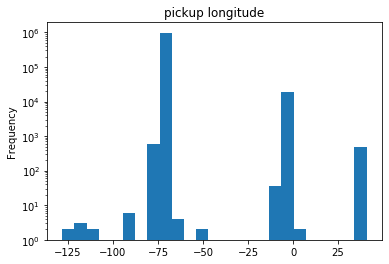

In [7]:
fig, ax = plt.subplots()
print(chunks[0]["pickup_longitude"].plot.hist(ax = ax, title="pickup longitude",bottom=1, bins=25))
ax.set_yscale('log')
# plot1 = chunks[0]['pickup_longitude']
# plot1.plot.hist(grid=True, bins=1, rwidth=0.9, color='#607c8e')
# plt.xlabel('Pregnancies')
# plt.grid(axis='y')

AxesSubplot(0.125,0.125;0.775x0.755)


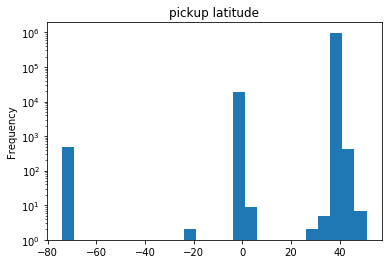

In [8]:
fig, ax = plt.subplots()
print(chunks[0]["pickup_latitude"].plot.hist(ax = ax, title="pickup latitude",bottom=1, bins=25))
ax.set_yscale('log')

AxesSubplot(0.125,0.125;0.775x0.755)


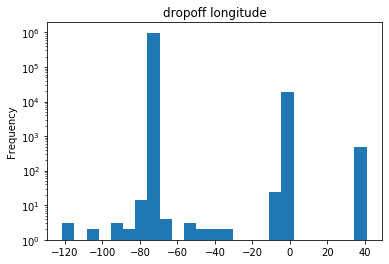

In [9]:
fig, ax = plt.subplots()
print(chunks[0]["dropoff_longitude"].plot.hist(ax = ax, title="dropoff longitude",bottom=1, bins=25))
ax.set_yscale('log')

AxesSubplot(0.125,0.125;0.775x0.755)


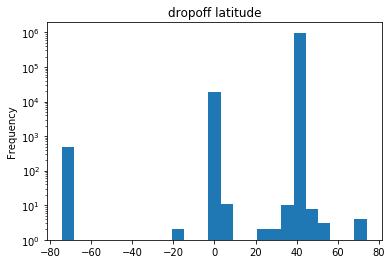

In [10]:
fig, ax = plt.subplots()
print(chunks[0]["dropoff_latitude"].plot.hist(ax = ax, title="dropoff latitude",bottom=1, bins=25))
ax.set_yscale('log')

AxesSubplot(0.125,0.125;0.775x0.755)


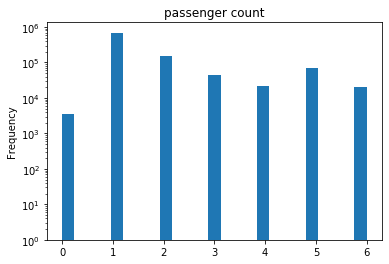

In [11]:
fig, ax = plt.subplots()
print(chunks[0]["passenger_count"].plot.hist(ax = ax, title="passenger count",bottom=1, bins=25))
ax.set_yscale('log')

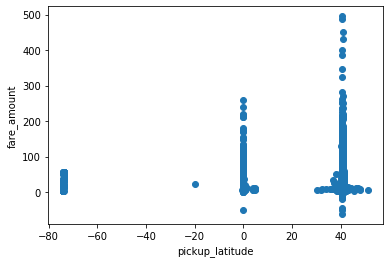

In [12]:
plt.scatter(chunks[0]["pickup_latitude"],chunks[0]["fare_amount"])
plt.xlabel("pickup_latitude")
plt.ylabel("fare_amount")
plt.show()

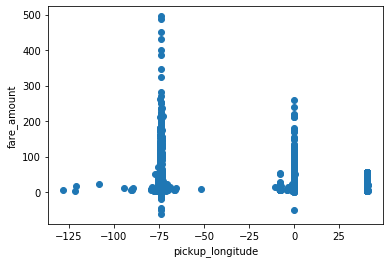

In [13]:
# fig, ax = plt.subplots()

plt.scatter(chunks[0]["pickup_longitude"],chunks[0]["fare_amount"])
plt.xlabel("pickup_longitude")
plt.ylabel("fare_amount")
plt.show()

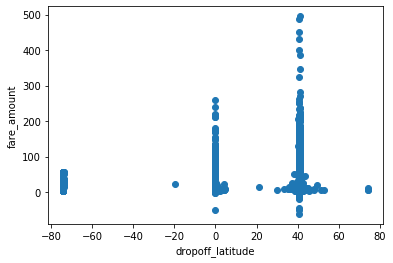

In [14]:
plt.scatter(chunks[0]["dropoff_latitude"],chunks[0]["fare_amount"])
plt.xlabel("dropoff_latitude")
plt.ylabel("fare_amount")
plt.show()

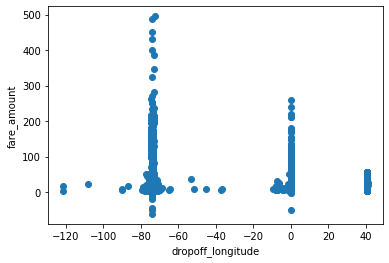

In [15]:
plt.scatter(chunks[0]["dropoff_longitude"],chunks[0]["fare_amount"])
plt.xlabel("dropoff_longitude")
plt.ylabel("fare_amount")
plt.show()

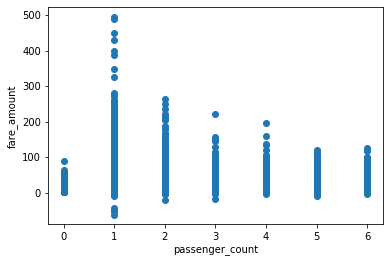

In [16]:
plt.scatter(chunks[0]["passenger_count"],chunks[0]["fare_amount"])
plt.xlabel("passenger_count")
plt.ylabel("fare_amount")
plt.show()

In [31]:
y = chunks[0]['fare_amount']
X = pd.DataFrame(chunks[0])
X = X.drop(['fare_amount','key','pickup_datetime'], axis = 1)
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.986910,40.739538,-73.991381,40.745614,2
1,-73.961572,40.760283,-73.957438,40.769387,5
2,-73.979437,40.746517,-73.984195,40.732117,1
3,-73.964097,40.792508,-73.976422,40.785767,1
4,-74.003943,40.725670,-73.988915,40.748370,1


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(749964, 5)
(749964,)
(249988, 5)
(249988,)


In [34]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred = linreg.predict(X_test)

In [38]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

9.782155692270697
